In [ ]:
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
     |████████████████████████████████| 10.3 MB 7.9 MB/s 
ERROR: pip's dependency re

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum/v1/df')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,LICNSTAT,LICNFELD,PRACTAGE,GRAD,ALEGATN1,OUTCOME,MALYEAR1,TOTALPMT,AAYEAR,TOTALPMT_FLOAT,Year,INF_FACTOR,TOTALPMT_ADJ,BASE_YEAR,PRACTEXP,PRACTEXP_ADJ,PRACTEXP_GROUP,TOTALPMT_GROUP,TOTALPMT_ADJ_GROUP,Label_ALEGATN1,Label_LICNFELD,Label_OUTCOME,PMT,COUNT
0,1,A,301,1991,OK,OK,10,60.0,1950.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,40.0,40.0,40.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
1,2,A,301,1991,OK,OK,10,40.0,1960.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,30.0,30.0,30.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
2,4,A,301,1991,MA,MA,15,30.0,1980.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,10.0,10.0,10.0,NaN,NaN,NaN,Physician Resident (MD),NaN,0,1
3,6,A,301,1990,OK,OK,10,40.0,1970.0,NaN,NaN,NaN,NaN,1990.0,NaN,1990,2.059640,NaN,1990.0,20.0,20.0,20.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
4,8,A,301,1990,OK,OK,10,40.0,1970.0,NaN,NaN,NaN,NaN,1990.0,NaN,1990,2.059640,NaN,1990.0,20.0,20.0,20.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557696,1945008,C,302,2020,NaN,CA,100,40.0,2000.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,20.0,20.0,20.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1
1557697,1945009,C,302,2020,NaN,NM,100,40.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1
1557698,1945010,C,302,2020,NaN,NM,100,40.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1
1557699,1945011,C,302,2020,NaN,NM,100,30.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1


Analysis

In [ ]:
feature = 'Label_LICNFELD'

The goal of this analysis is to find a numerical basis for including ALEGATN1 as a variable in our model. For probability, one way to substantiate is to show that there is significant variance in the probabilities of a claim resulting in a payment based upon a practitioner's licensing state.

In [ ]:
df = df[[feature, 'PMT', 'TOTALPMT_ADJ']]
df['count'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Below, probability is simpy the the number of rows for each ALEGATN1 where totalpmt is greater than zero divided by the number of rows for each ALEGATN1.


In [ ]:
df = df.groupby(by = feature).sum()
df['Probability'] = df['PMT']/df['count']
df = df.sort_values(by = 'Probability', ascending = False)
df[feature] = df.index
df

,PMT,TOTALPMT_ADJ,count,Probability,Label_LICNFELD
Label_LICNFELD,,,,,
Pastoral Counselor [available 11/17/2014],2,3.034981e+05,2,1.000000,Pastoral Counselor [available 11/17/2014]
Cytotechnologist [available 11/22/99],9,3.509957e+06,14,0.642857,Cytotechnologist [available 11/22/99]
Nurse Midwife,932,7.505766e+08,1574,0.592122,Nurse Midwife
Nurse Practitioner,2893,9.451839e+08,6735,0.429547,Nurse Practitioner
Nurse Anesthetist,1213,4.590638e+08,2948,0.411465,Nurse Anesthetist
...,...,...,...,...,...
Hospital Administrator [available 11/22/99],0,0.000000e+00,29,0.000000,Hospital Administrator [available 11/22/99]
Hospice/Hospice Care Provider,0,0.000000e+00,230,0.000000,Hospice/Hospice Care Provider
Home Health Agency/Organization,0,0.000000e+00,7303,0.000000,Home Health Agency/Organization


In [ ]:
check = df['count'].sum()
check

# 1,557,701 rows (all) are have LICNFELD assigned

1557701

Graph

In [ ]:
# sort values by 'count' to form
df = df.sort_values(by = 'Probability', ascending = False)

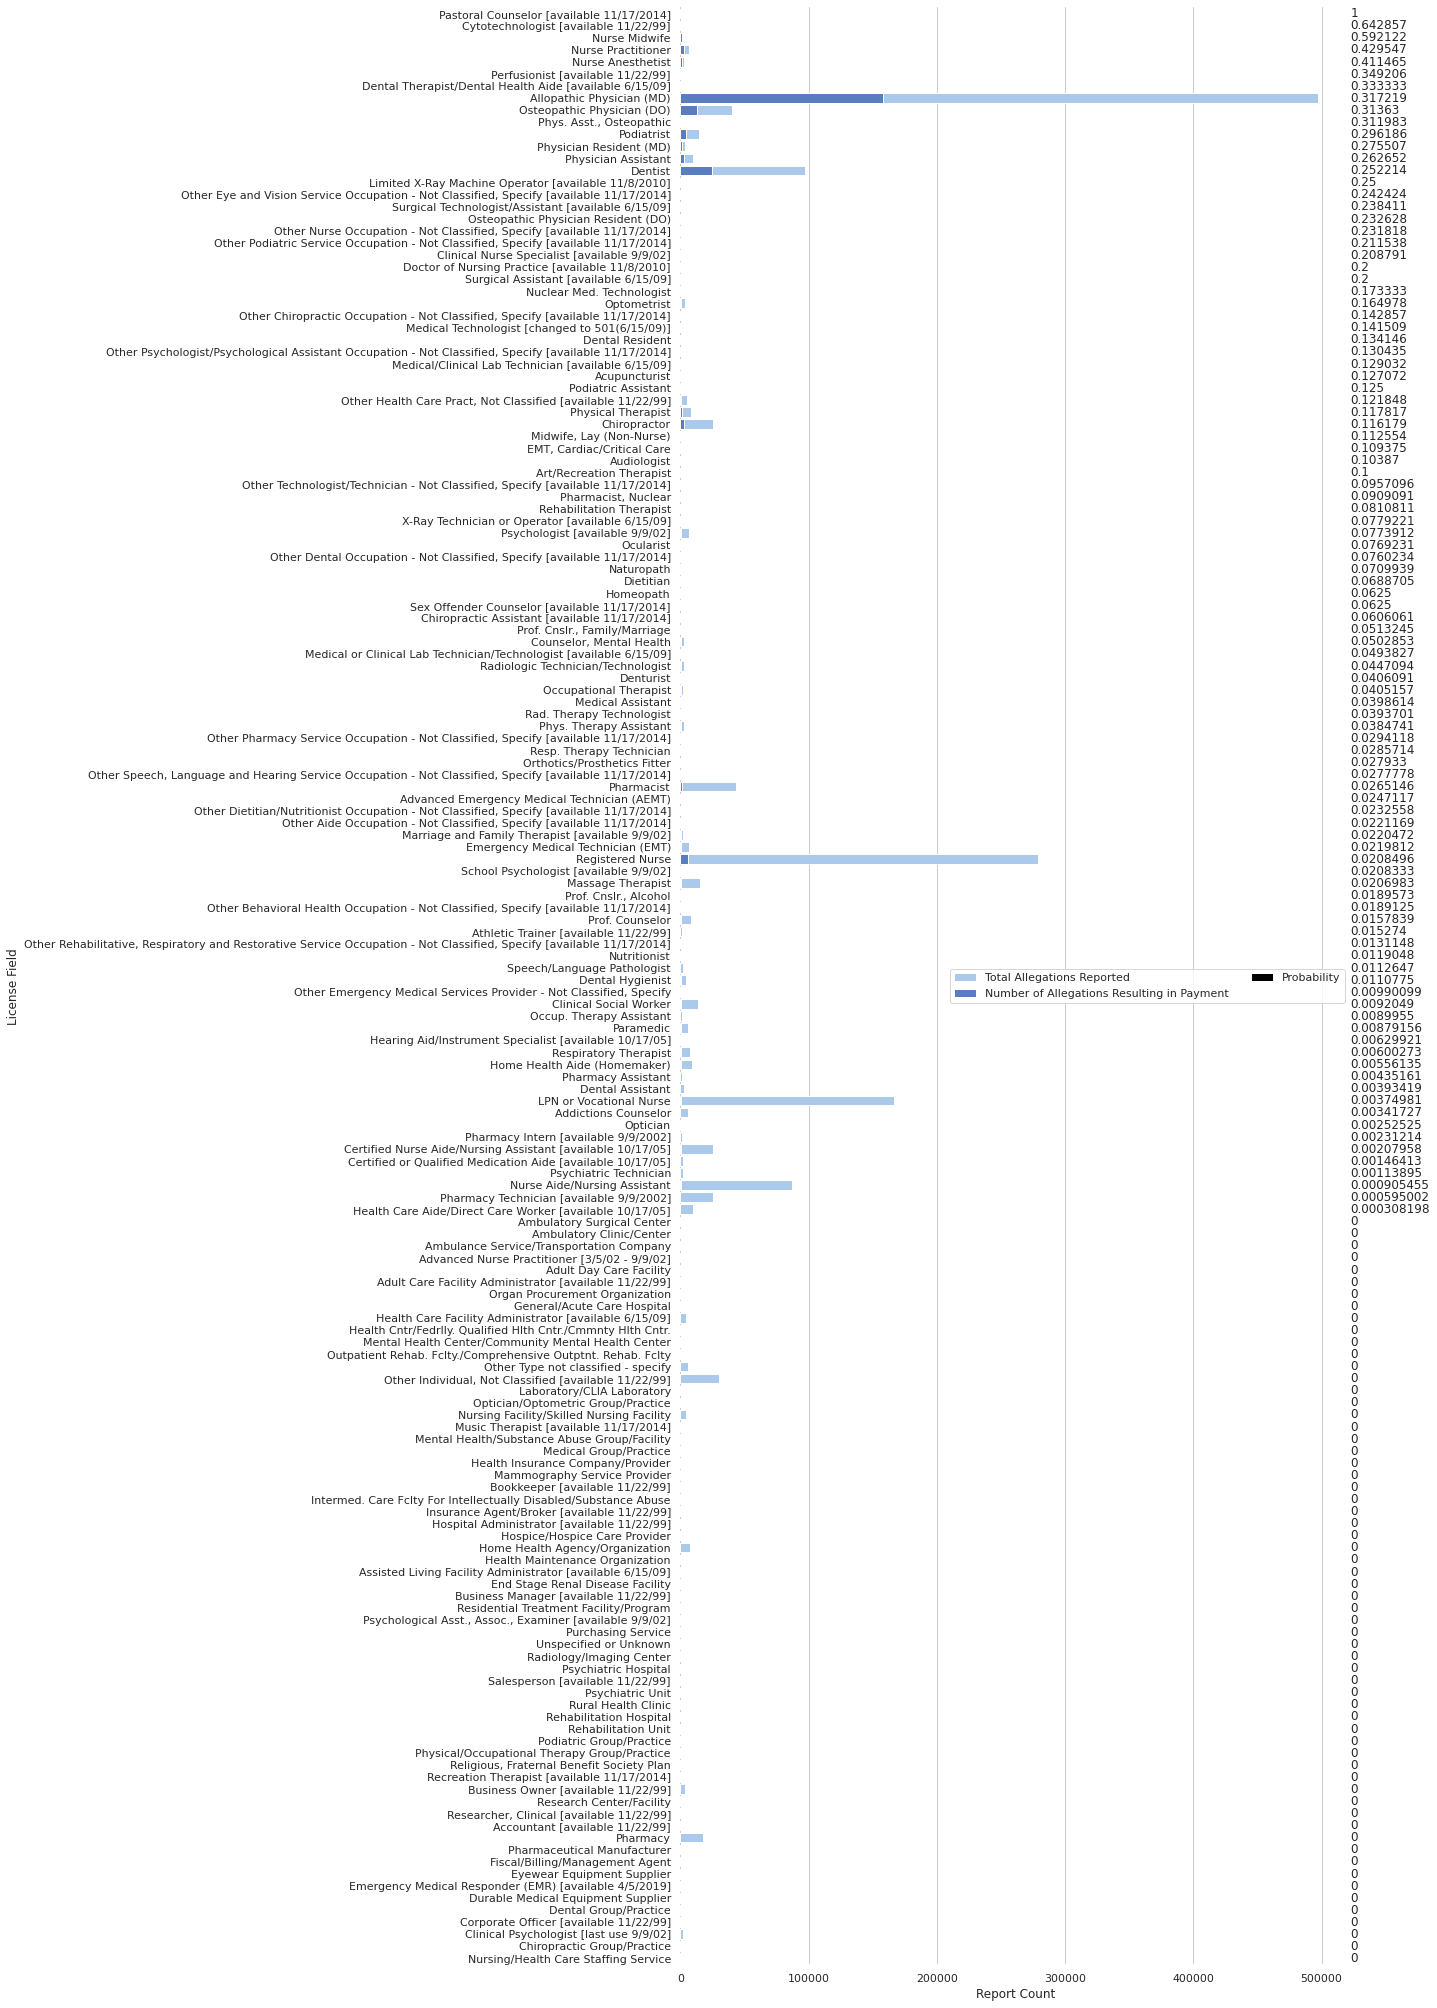

In [ ]:
fig, ax = plt.subplots(figsize=(12, 36))

sns.set_theme(style="whitegrid")

sns.set_color_codes("pastel")
chart_1 = sns.barplot(x="count", y=feature, data=df, label="Total Allegations Reported", color="b")

sns.set_color_codes("muted")
chart_2 = sns.barplot(x="PMT", y=feature, data=df, label="Number of Allegations Resulting in Payment", color="b")

chart_3 = sns.barplot(x="Probability", y=feature, data=df, label="Probability", color="black")

chart_1.bar_label(chart_1.containers[2], padding = 670)

ax.legend(ncol=2, loc="right", frameon=True)
ax.set(ylabel="License Field", xlabel="Report Count")
sns.despine(left=True, bottom=True)

Graph (Top 30 count)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum/v1/df')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df[[feature, 'PMT', 'TOTALPMT_ADJ']]
df['count'] = 1

df = df.groupby(by = feature).sum()
df['Probability'] = df['PMT']/df['count']
df = df.sort_values(by = 'Probability', ascending = False)
df[feature] = df.index
df

,PMT,TOTALPMT_ADJ,count,Probability,Label_LICNFELD
Label_LICNFELD,,,,,
Pastoral Counselor [available 11/17/2014],2,3.034981e+05,2,1.000000,Pastoral Counselor [available 11/17/2014]
Cytotechnologist [available 11/22/99],9,3.509957e+06,14,0.642857,Cytotechnologist [available 11/22/99]
Nurse Midwife,932,7.505766e+08,1574,0.592122,Nurse Midwife
Nurse Practitioner,2893,9.451839e+08,6735,0.429547,Nurse Practitioner
Nurse Anesthetist,1213,4.590638e+08,2948,0.411465,Nurse Anesthetist
...,...,...,...,...,...
Hospital Administrator [available 11/22/99],0,0.000000e+00,29,0.000000,Hospital Administrator [available 11/22/99]
Hospice/Hospice Care Provider,0,0.000000e+00,230,0.000000,Hospice/Hospice Care Provider
Home Health Agency/Organization,0,0.000000e+00,7303,0.000000,Home Health Agency/Organization


In [ ]:
# sort values by 'count' to form
df = df.sort_values(by = 'count', ascending = False)
df = df[:30]
df

,PMT,TOTALPMT_ADJ,count,Probability,Label_LICNFELD
Label_LICNFELD,,,,,
Allopathic Physician (MD),157781,6.840100e+10,497388,0.317219,Allopathic Physician (MD)
Registered Nurse,5816,2.154198e+09,278950,0.020850,Registered Nurse
LPN or Vocational Nurse,626,1.288954e+08,166942,0.003750,LPN or Vocational Nurse
Dentist,24546,2.130690e+09,97322,0.252214,Dentist
Nurse Aide/Nursing Assistant,79,1.919898e+07,87249,0.000905,Nurse Aide/Nursing Assistant
Pharmacist,1151,1.329144e+08,43410,0.026515,Pharmacist
Osteopathic Physician (DO),12649,5.222528e+09,40331,0.313630,Osteopathic Physician (DO)
"Other Individual, Not Classified [available 11/22/99]",0,0.000000e+00,29900,0.000000,"Other Individual, Not Classified [available 11..."
Chiropractor,2983,4.460104e+08,25676,0.116179,Chiropractor


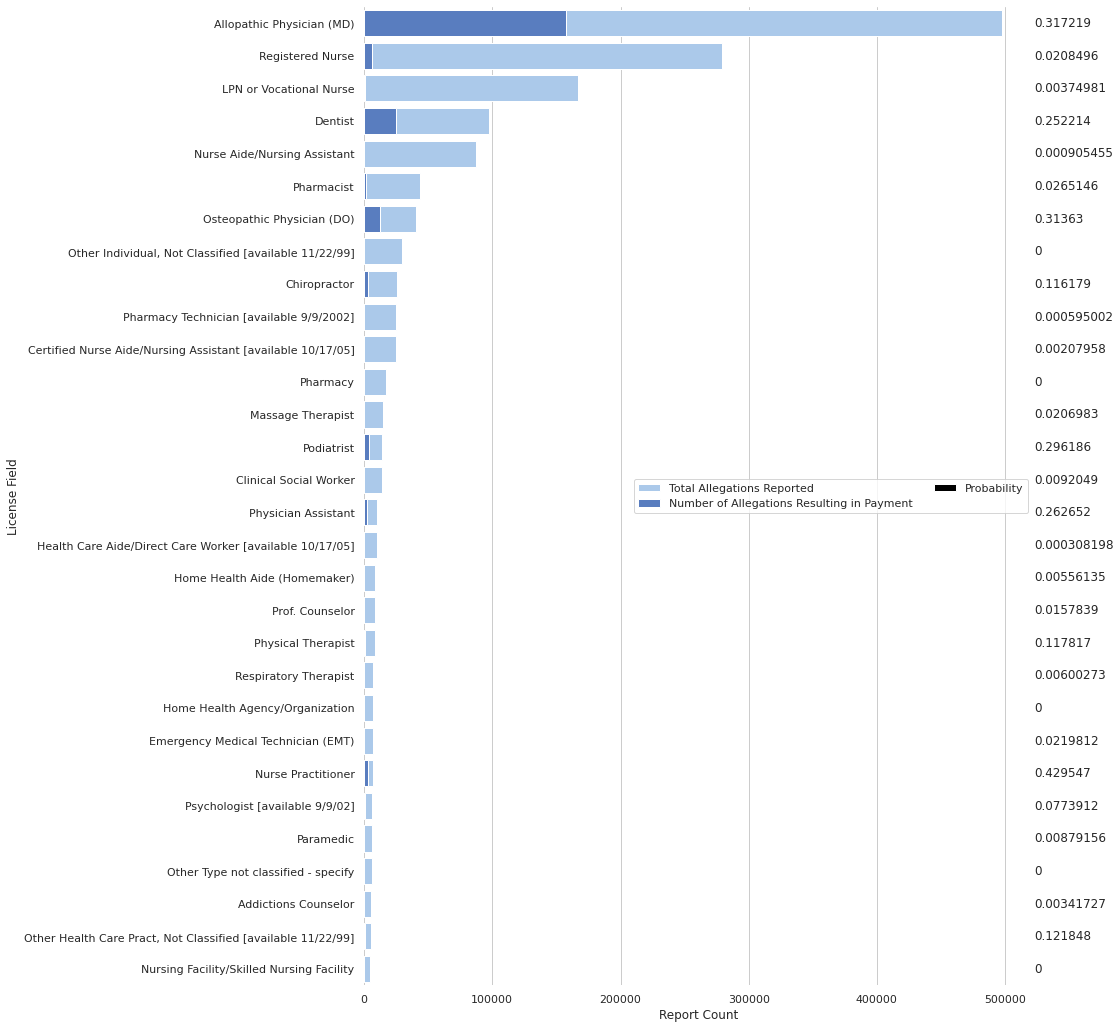

In [ ]:
fig, ax = plt.subplots(figsize=(12, 18))

sns.set_theme(style="whitegrid")

sns.set_color_codes("pastel")
chart_1 = sns.barplot(x="count", y=feature, data=df, label="Total Allegations Reported", color="b")

sns.set_color_codes("muted")
chart_2 = sns.barplot(x="PMT", y=feature, data=df, label="Number of Allegations Resulting in Payment", color="b")

chart_3 = sns.barplot(x="Probability", y=feature, data=df, label="Probability", color="black")

chart_1.bar_label(chart_1.containers[2], padding = 670)

ax.legend(ncol=2, loc="right", frameon=True)
ax.set(ylabel="License Field", xlabel="Report Count")
sns.despine(left=True, bottom=True)